### Network Analysis: Two-Mode Networks

Homework Team 4 - John Grando, Nick Capofari, Ken Markus, Armenoush Aslanian-Persico, Andrew Goldberg

MSDA Data 620, Week 3 Part 2

### Part 1: Introduction

#### 1. Background

In this assignment we want to analyze two-node networks and determine relationships between nodes. 

The dataset represents observed attendance at 14 social events by 18 Southern women in the 1930s. The result is a person-by-event matrix: cell (i,j) is 1 if person i attended social event j, and 0 otherwise.

What can we infer about the relationships between the women and social events?

See https://rdrr.io/cran/latentnet/man/davis.html for more information on the dataset.

#### 2. Setup and packages

In [267]:
%%javascript

Jupyter.keyboard_manager.command_shortcuts.add_shortcut('m', { // # added keyboard shortcut for Jupyter - Ctrl+M, then m runs all cells
    help : 'run all cells',
    help_index : 'zz',
    handler : function (event) {
        IPython.notebook.execute_all_cells();
        return false;
    }}
);

<IPython.core.display.Javascript object>

In [268]:
import networkx as nx
import networkx.algorithms
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
import numpy
import pandas as pd

from networkx.algorithms.components.connected import connected_components
from scipy.spatial import distance
from scipy.cluster import hierarchy
from collections import defaultdict

% matplotlib inline

In [269]:
# Load data
G = nx.davis_southern_women_graph()
women, events = nx.bipartite.sets(G)

### Part 2: Summary statistics

#### 1. Test if the graph is connected.

In [270]:
nx.is_connected(G) 

True

The graph is connected, with no unconnected elements.

#### 2. Test if the graph is bipartite.

In [271]:
bipartite.is_bipartite(G)

True

The graph is bipartite.

#### 3. Show the number of nodes and edges and the average degree.

In [272]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625


The average degree connectivity is the average nearest neighbor degree of nodes with degree k. 

#### 4. Show the center, diameter, and radius.

In [273]:
center = nx.center(G)
diameter = nx.diameter(G)
radius = nx.radius(G)
print("Center:", center)
print("Diameter:", diameter)
print("Radius:", radius)

Center: ['Evelyn Jefferson', 'Theresa Anderson', 'Ruth DeSand', 'Verne Sanderson', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'E6', 'E7', 'E8', 'E9']
Diameter: 4
Radius: 3


### Part 3: Unweighted Bipartite Projection

E nodes indicate social events; named nodes indicate participants.

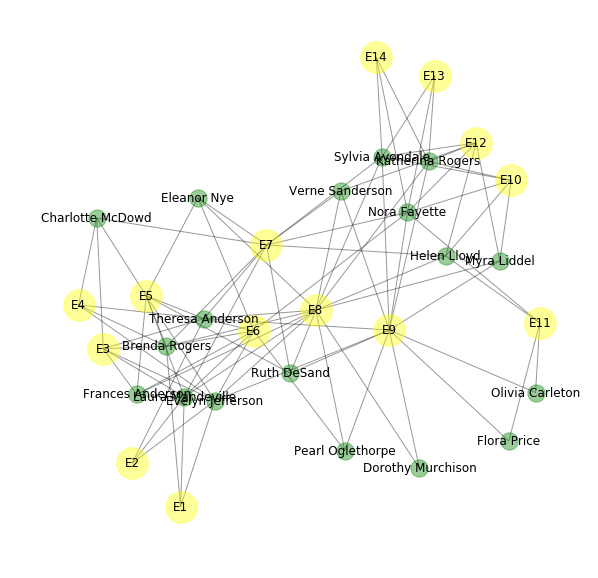

In [274]:
plt.figure(figsize = (10, 10))
plt.axis('off')
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=women, node_color='green', alpha = 0.4)
nx.draw_networkx_nodes(G, pos, nodelist=events, node_color='yellow', alpha = 0.4, node_size = 1000)
nx.draw_networkx_edges(G, pos, alpha = 0.4)
nx.draw_networkx_labels(G, pos);

### Part 4: Weighted Bipartite Projection

"E" nodes indicate social events; named nodes indicate participants.
Nodes with more connections are displayed larger.

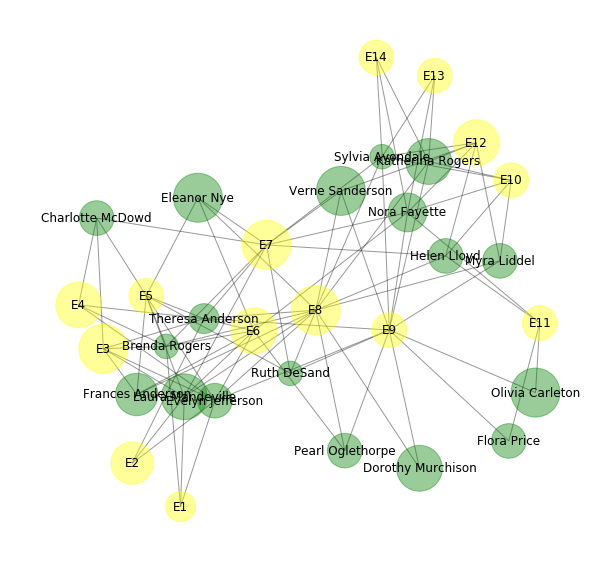

In [275]:
plt.figure(figsize = (10, 10))
plt.axis('off')
node_sizes=[G.degree(i)*300 for i in G.nodes()]
#nx.draw_networkx(G,pos, node_size=node_sizes,with_labels=True, alpha = 0.8, node_color="orange")

nx.draw_networkx_nodes(G, pos, nodelist=women, node_color='green', alpha = 0.4, node_size = node_sizes)
nx.draw_networkx_nodes(G, pos, nodelist=events, node_color='yellow', alpha = 0.4, node_size = node_sizes)
nx.draw_networkx_edges(G, pos, alpha = 0.4)
nx.draw_networkx_labels(G, pos);

In [276]:
nodes = []
betweenness = [] 
for i, j in sorted(nx.betweenness_centrality(G).items(), key=lambda kv: (-kv[1], kv[0]))[0:11]: 
    nodes.append(i)
    betweenness.append(j)
d = {"Node":nodes, "Betweenness": betweenness}
data = pd.DataFrame(d)
print (data[["Node","Betweenness"]])

                Node  Betweenness
0                 E8     0.237003
1                 E9     0.219209
2                 E7     0.125881
3       Nora Fayette     0.108581
4   Evelyn Jefferson     0.092431
5   Theresa Anderson     0.083827
6    Sylvia Avondale     0.068625
7                 E6     0.063199
8   Laura Mandeville     0.049149
9      Brenda Rogers     0.047358
10  Katherina Rogers     0.045326


Calculating betweenness mirrors the graph projection of highly connected nodes.

### Part 5: Unipartite Projection, Women

View weights of associations between nodes.

Here we output a list of women nodes with the highest betweenness centrality values. We verify these well-connected nodes in the graph projections.

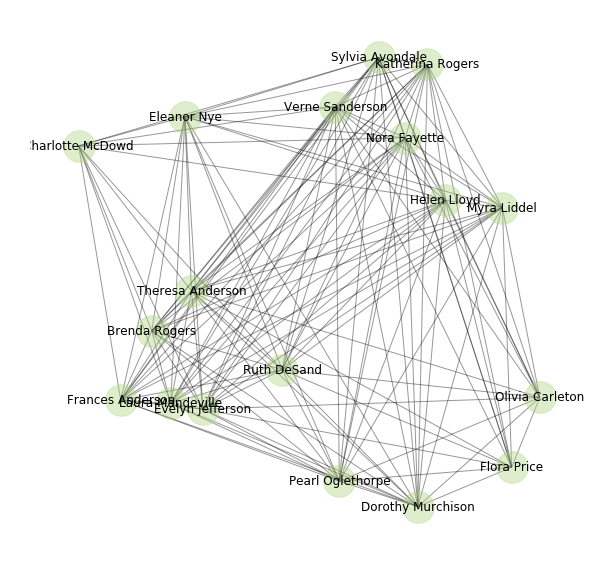

In [277]:
BPWomen = bipartite.projected_graph(G, women)
plt.figure(figsize = (10, 10))
plt.axis('off')

nx.draw_networkx_nodes(BPWomen, pos, nodelist=women, node_color='#aed581', alpha = 0.4, node_size=1000)
nx.draw_networkx_edges(BPWomen, pos, alpha = 0.4)
nx.draw_networkx_labels(BPWomen, pos);

In [278]:
print("Connections, Woman")
for i in women:
    print('%d %s' % (BPWomen.degree(i),i))

Connections, Woman
17 Verne Sanderson
16 Dorothy Murchison
15 Eleanor Nye
16 Katherina Rogers
16 Pearl Oglethorpe
12 Flora Price
17 Evelyn Jefferson
17 Theresa Anderson
16 Myra Liddel
17 Helen Lloyd
11 Charlotte McDowd
15 Frances Anderson
15 Laura Mandeville
12 Olivia Carleton
17 Nora Fayette
17 Ruth DeSand
15 Brenda Rogers
17 Sylvia Avondale


In [279]:
def topcentrality(G):
    toplist = sorted(G.items(), key=lambda kv: (-kv[1], kv[0]) ) 
    return toplist

In [280]:
topcentrality(nx.betweenness_centrality(BPWomen))

[('Evelyn Jefferson', 0.010122230710466005),
 ('Helen Lloyd', 0.010122230710466005),
 ('Nora Fayette', 0.010122230710466005),
 ('Ruth DeSand', 0.010122230710466005),
 ('Sylvia Avondale', 0.010122230710466005),
 ('Theresa Anderson', 0.010122230710466005),
 ('Verne Sanderson', 0.010122230710466005),
 ('Dorothy Murchison', 0.005347593582887701),
 ('Katherina Rogers', 0.005347593582887701),
 ('Myra Liddel', 0.005347593582887701),
 ('Pearl Oglethorpe', 0.005347593582887701),
 ('Brenda Rogers', 0.00267379679144385),
 ('Eleanor Nye', 0.00267379679144385),
 ('Frances Anderson', 0.00267379679144385),
 ('Laura Mandeville', 0.00267379679144385),
 ('Charlotte McDowd', 0.0),
 ('Flora Price', 0.0),
 ('Olivia Carleton', 0.0)]

Seven women have greater betweennees centrality than the remaining women. This is also verified by the graph projection, with nodes for the most social women containing many edges.

### Part 6: Unipartite Projection, Events

View weights of associations between nodes.

Here we output a list of events nodes with the highest betweenness centrality values. We verify these well-connected nodes in the graph projections.

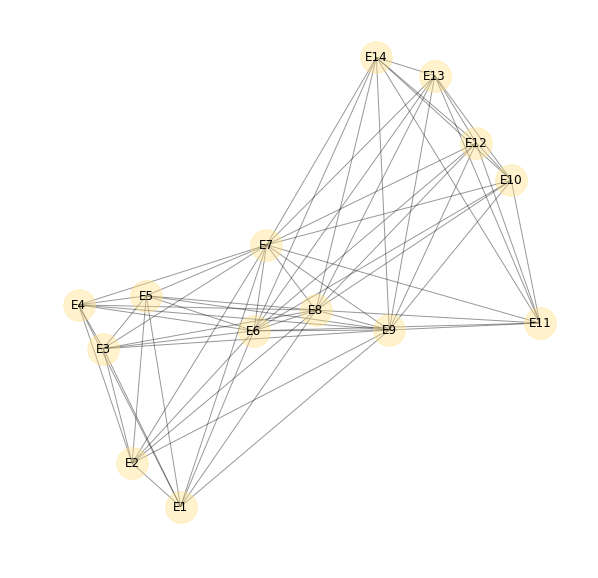

In [281]:
BPEvents = bipartite.projected_graph(G, events)
plt.figure(figsize = (10, 10))
plt.axis('off')

nx.draw_networkx_nodes(BPEvents, pos, nodelist=events, node_color='#ffe082', alpha = 0.4, node_size=1000)
nx.draw_networkx_edges(BPEvents, pos, alpha = 0.4)
nx.draw_networkx_labels(BPEvents, pos);

In [282]:
print("Event, Connections")
for i in events:
    print('%s %d' % (i, BPEvents.degree(i)))

Event, Connections
E7 13
E4 8
E8 13
E12 8
E11 8
E13 8
E10 8
E1 8
E5 8
E14 8
E9 13
E2 8
E6 13
E3 8


In [283]:
topcentrality(nx.betweenness_centrality(BPEvents))

[('E6', 0.08012820512820512),
 ('E7', 0.08012820512820512),
 ('E8', 0.08012820512820512),
 ('E9', 0.08012820512820512),
 ('E1', 0.0),
 ('E10', 0.0),
 ('E11', 0.0),
 ('E12', 0.0),
 ('E13', 0.0),
 ('E14', 0.0),
 ('E2', 0.0),
 ('E3', 0.0),
 ('E4', 0.0),
 ('E5', 0.0)]

Four events have greater betweennees centrality than the remaining events. This is also verified by the graph projection, with popular events containing many edges.

### Part 7: Ego Networks

View connections related to one individual.

Here we compare a high-centrality node and a low-centrality node.

In [284]:
nx.ego_graph(G, 'Evelyn Jefferson')
ego_net=nx.ego_graph(G, 'Evelyn Jefferson')
print(nx.info(ego_net))

Name: 
Type: Graph
Number of nodes: 9
Number of edges: 8
Average degree:   1.7778


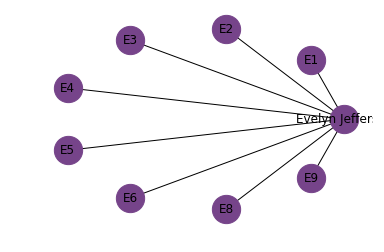

In [285]:
pos=nx.shell_layout(ego_net)
nx.draw_networkx(ego_net, pos, node_size=800, node_color='#76448A')
plt.axis('off')
plt.figure(figsize = (10, 10))

In [286]:
nx.ego_graph(G, 'Flora Price')


In [287]:
ego_net2=nx.ego_graph(G, 'Flora Price')
print(nx.info(ego_net2))


Name: 
Type: Graph
Number of nodes: 3
Number of edges: 2
Average degree:   1.3333


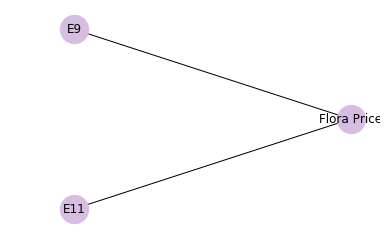

In [288]:
pos=nx.shell_layout(ego_net2)
nx.draw_networkx(ego_net2, pos, node_size=800, node_color='#D7BDE2')
plt.axis('off')
plt.figure(figsize = (10, 10))

In [289]:
print("\tThe number of nodes connected to Evelyn Jefferson: " + 
      str(len(G.neighbors('Evelyn Jefferson'))) +  "\n")
print("\tThe number of nodes connected to Flora Price: " + 
      str(len(G.neighbors('Flora Price')))  + "\n")

	The number of nodes connected to Evelyn Jefferson: 8

	The number of nodes connected to Flora Price: 2



The eccentricity of a node v is the maximum distance from v to all other nodes in G. The radius is the minimum eccentricity. The diameter is the maximum eccentricity.

Again the degree and node calculations are verified by the graph projection. A highly connected node has a higher degree and more graph edges.

### Part 8: Conclusion

We can see that events and attendees are closely connected. There were no unconnected nodes.

Certain events were more attended, and some women attended more events than average. Seven out of 18 women had a centrality measure of 0.010 or higher. Four out of 14 events -- numbers 6, 7, 8 and 9--  had a centrality measure of 0.08 or higher. Strong centrality for these nodes was visible in the graph projections, as the nodes were centrally located and closely connected.

Three women had a lower participation rate as indicated by their degree and centrality measures. Even in this less involved group, each woman attended at least two events. Two subgroups were indicated by the network projection graphs, where closely connected women were likely to attend the same events. 

No single woman or women held a unique position of centrality. In other words, the weight of the social group was distributed among several top ranked nodes, and no single node split the subgroups. This indicates the stability of the group. If one node were to be removed from the group, the network would remain.
